In [1]:
import re
import numpy as np
from scipy.stats import kstest
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_robots(textfile):
    robots = []
    file = open(textfile, "r")
    for line in file:
        l = line.strip()
        l2 = [int(n) for n in re.findall('[0123456789-]+', l)]
        robots.append(l2)
    return robots

def predict_robot_location(x, y, vx, vy, sec=100, xlim=101, ylim=103):
    new_x = (x+vx*sec)%xlim
    new_y = (y+vy*sec)%ylim
    return(new_x, new_y)

def assign_quadrants(robot_locations, xlim=101, ylim=103):
    result = {'q1':0, 'q2':0, 'q3':0, 'q4':0}
    left_side = range(xlim//2)
    top_side = range(ylim//2)
    right_side = range((xlim//2+xlim%2), xlim)
    bottom_side = range((ylim//2+ylim%2), ylim)
    for l in robot_locations:
        if l[0] in left_side and l[1] in top_side:
            result['q1']+=1
        elif l[0] in left_side and l[1] in bottom_side:
            result['q2']+=1
        elif l[0] in right_side and l[1] in top_side:
            result['q3']+=1
        elif l[0] in right_side and l[1] in bottom_side:
            result['q4']+=1
        else:
            pass
    return result

In [3]:
robots = load_robots('day14.txt')

robot_locations = []

for r in robots:
    robot_location = predict_robot_location(r[0],r[1],r[2],r[3])
    robot_locations.append(robot_location)
    
robot_quadrants = assign_quadrants(robot_locations)
print(robot_quadrants)

{'q1': 111, 'q2': 125, 'q3': 128, 'q4': 127}


In [7]:
def get_robot_locations(robots, seconds, xlim=101, ylim=103):
    x_locs = np.zeros((len(robots)))
    y_locs = np.zeros((len(robots)))
    for i, r in enumerate(robots):
        robot_loc = predict_robot_location(r[0],r[1],r[2],r[3], sec=seconds)
        x_locs[i] = robot_loc[0]
        y_locs[i] = robot_loc[1]
    statistic_x, p_val_x = kstest(x_locs, 'uniform', args=(0, xlim))
    statistic_y, p_val_y = kstest(y_locs, 'uniform', args=(0, ylim))
    if (p_val_x < .01) and (p_val_y < .01):
        robot_array = np.zeros((xlim, ylim), dtype=np.int8)
        for i in range(len(robots)):
            rxl = int(x_locs[i])
            ryl = int(y_locs[i])           
            robot_array[rxl,ryl]+=1
        plt.figure(figsize=(10, 10))
        plot = sns.heatmap(robot_array, cmap='Greens', cbar=False)
        plt.title("Warning! Suspicious pattern located at " + str(s) + " seconds!\n" + "p_val_x = " + str(round(p_val_x, 3)) + ",  p_val_y = " + str(round(p_val_y, 3)))
        print("Warning! Suspicious pattern located at " + str(s) + " seconds!")
        return plot
    else:
        return None

0
1000
2000
3000
4000
5000
6000
7000
Warning! Suspicious pattern located at 7371 seconds!
Warning! Suspicious pattern located at 7674 seconds!
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
Warning! Suspicious pattern located at 17774 seconds!
18000
Warning! Suspicious pattern located at 18077 seconds!
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
Warning! Suspicious pattern located at 28177 seconds!
Warning! Suspicious pattern located at 28480 seconds!
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
Warning! Suspicious pattern located at 38580 seconds!
Warning! Suspicious pattern located at 38883 seconds!
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
Warning! Suspicious pattern located at 48983 seconds!
49000
Warning! Suspicious pattern located at 49286 seconds!
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
Warning! Suspicious pattern located at 59386 seconds!
Warning! Suspicious pattern located at 59689 seconds!
60000
6

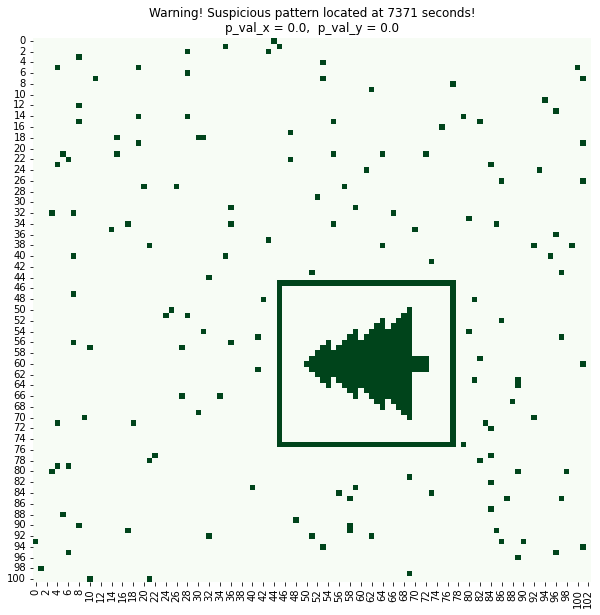

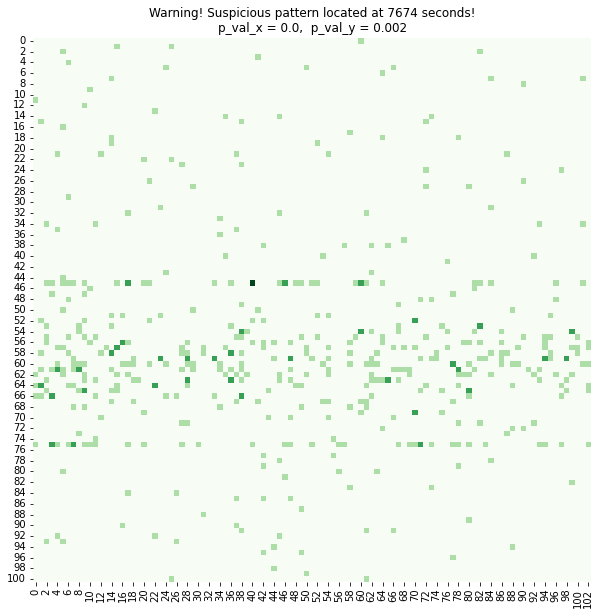

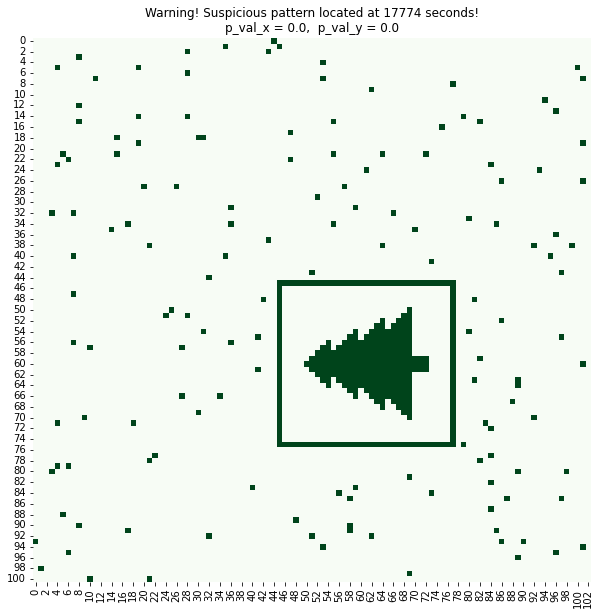

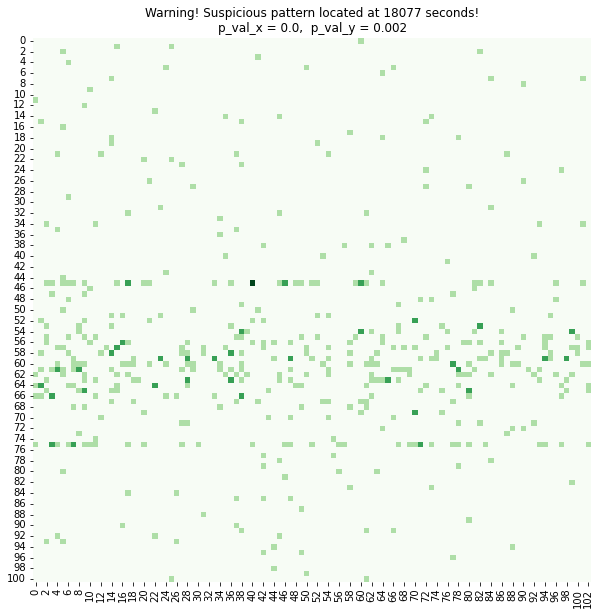

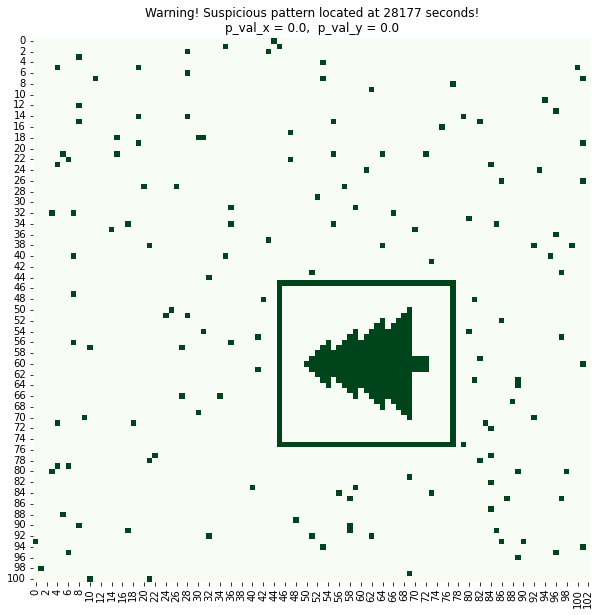

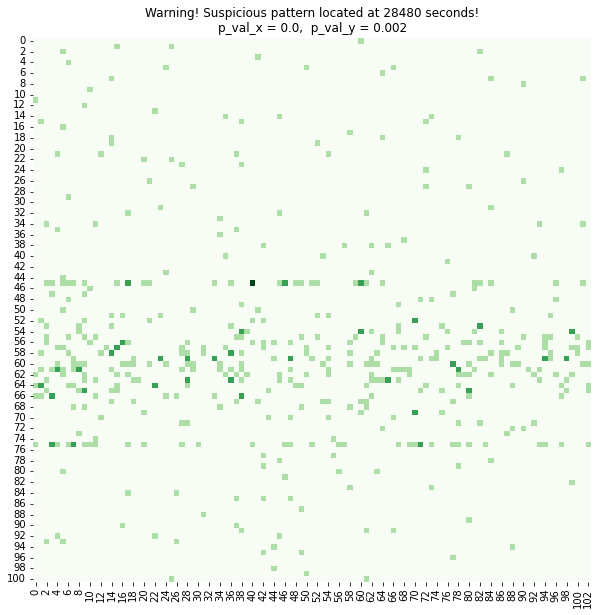

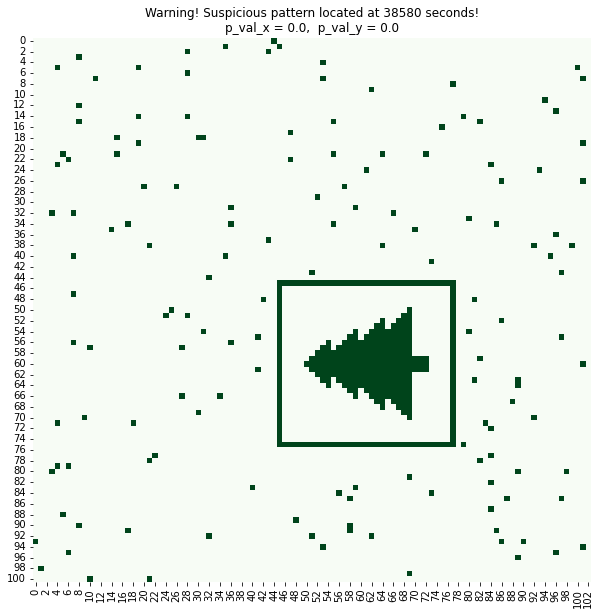

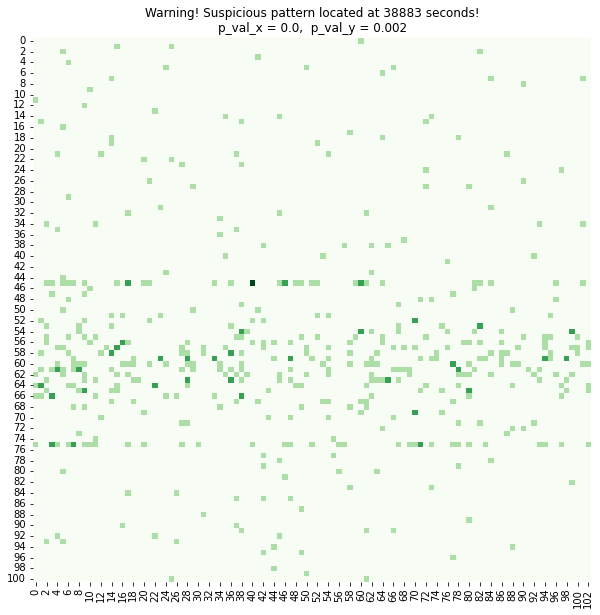

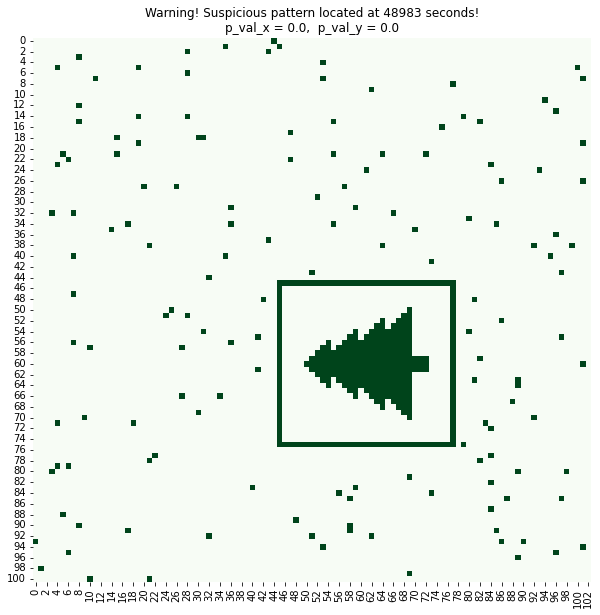

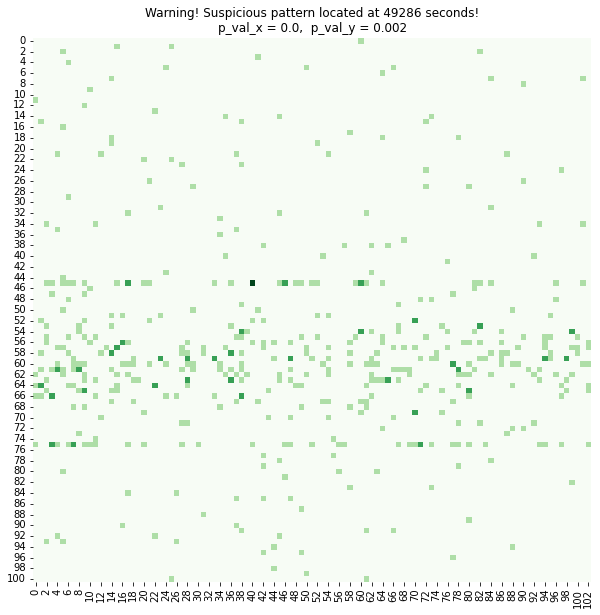

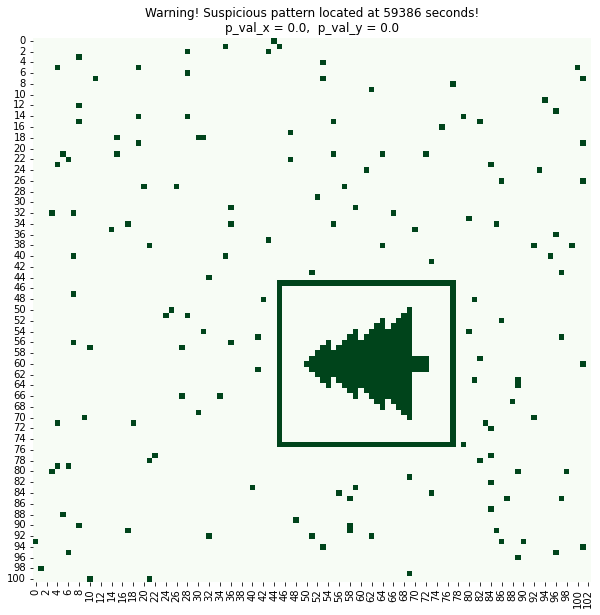

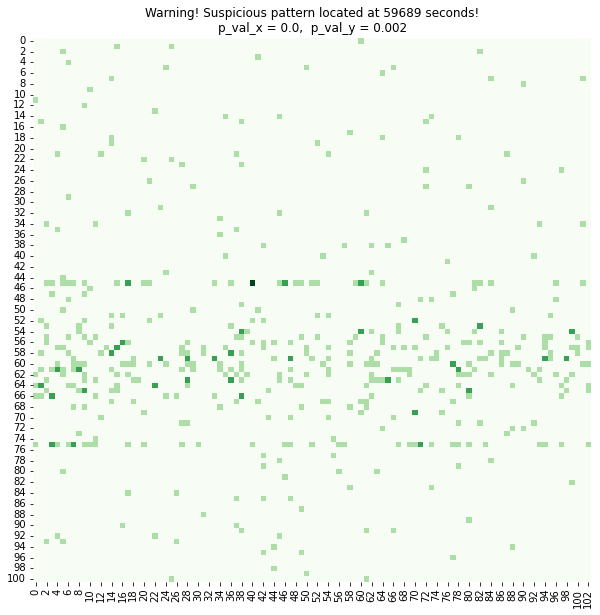

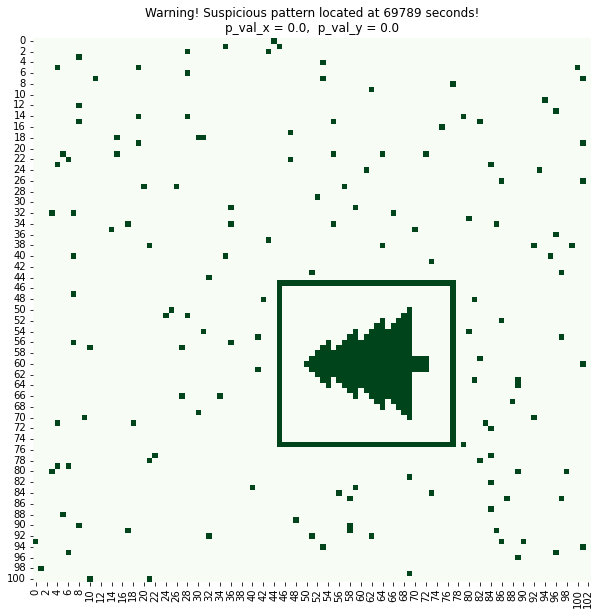

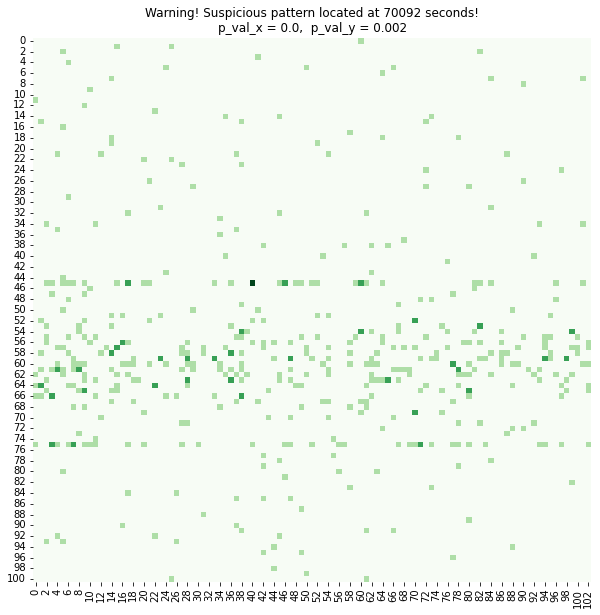

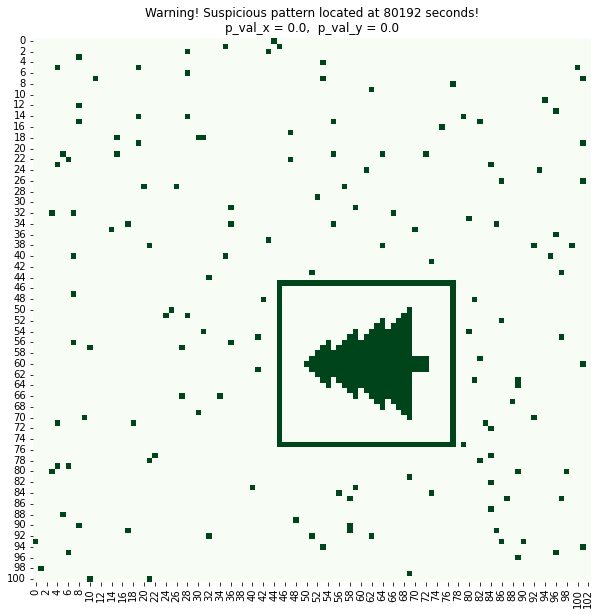

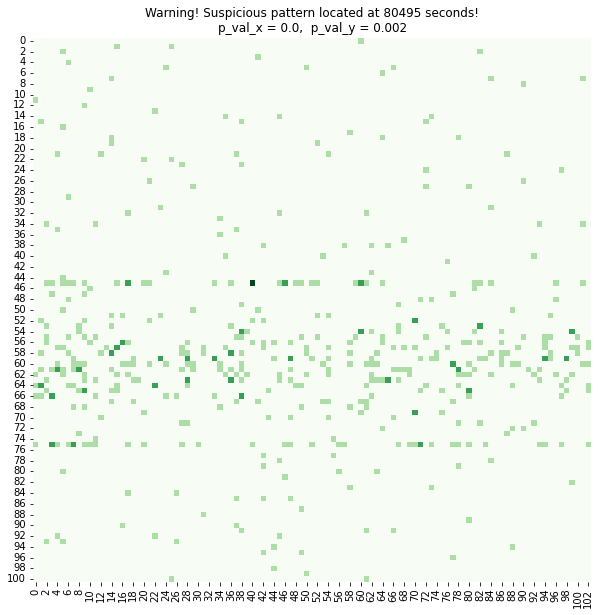

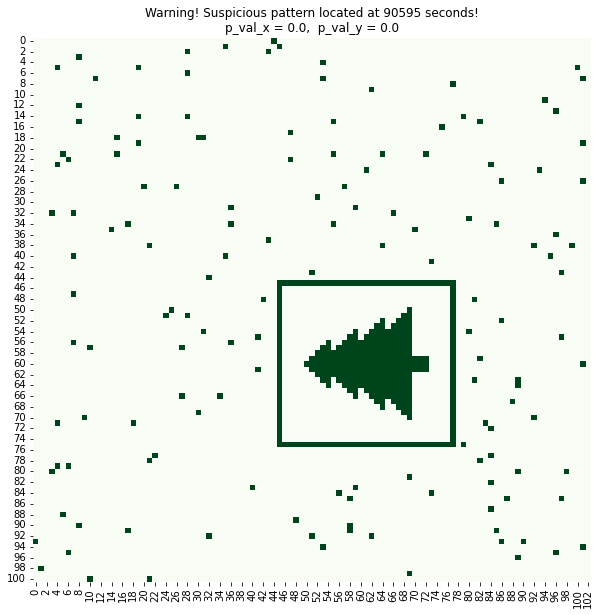

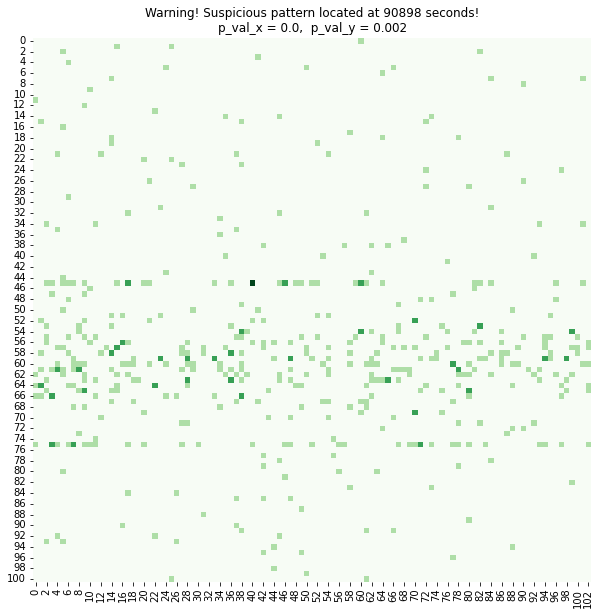

In [8]:
for s in range(100000):
    get_robot_locations(robots, s)
    if s% 1000 == 0:
        print(s)